In [1]:
# !pip install influxdb-client

In [2]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [3]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)
query_api = client.query_api()

{'bucket': 'FinalExperiment', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [4]:
query_standard = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 151)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_standard)

      timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0          30.0       0.0        0.041667            1.0  200.010851  \
1          30.0       1.0        0.041667            1.0  200.010851   
2          30.0       2.0        0.041667            1.0  200.010851   
3          30.0       3.0        0.041667            1.0  200.010851   
4          30.0       4.0        0.000000            0.0  200.000000   
...         ...       ...             ...            ...         ...   
1066      630.0      46.0        0.125000            3.0  200.292969   
1067      630.0      47.0        0.083333            2.0  200.086806   
1068      630.0      48.0        0.083333            2.0  200.086806   
1069      630.0      49.0        0.083333            2.0  200.086806   
1070      630.0      50.0        0.083333            2.0  200.086806   

       energyUsage  
0     6.000305e+03  
1     1.200054e+04  
2     1.800071e+04  
3     2.400081e+04  
4     3.000090e+04  
...      

In [5]:
query_heft = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 152)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_heft)

      timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0          30.0       0.0        0.041667            1.0  200.010851  \
1          30.0       1.0        0.041667            1.0  200.010851   
2          30.0       2.0        0.041667            1.0  200.010851   
3          30.0       3.0        0.041667            1.0  200.010851   
4          30.0       4.0        0.000000            0.0  200.000000   
...         ...       ...             ...            ...         ...   
1066      630.0      46.0        0.083333            2.0  200.086806   
1067      630.0      47.0        0.083333            2.0  200.086806   
1068      630.0      48.0        0.083333            2.0  200.086806   
1069      630.0      49.0        0.083333            2.0  200.086806   
1070      630.0      50.0        0.083333            2.0  200.086806   

       energyUsage  
0     6.000305e+03  
1     1.200054e+04  
2     1.800071e+04  
3     2.400081e+04  
4     3.000090e+04  
...      

In [6]:
query_random = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 153)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_random)

      timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0          30.0       0.0        0.041667            1.0  200.010851  \
1          30.0       1.0        0.041667            1.0  200.010851   
2          30.0       2.0        0.041667            1.0  200.010851   
3          30.0       3.0        0.041667            1.0  200.010851   
4          30.0       4.0        0.041667            1.0  200.010851   
...         ...       ...             ...            ...         ...   
1066      630.0      46.0        0.083333            2.0  200.086806   
1067      630.0      47.0        0.125000            3.0  200.292969   
1068      630.0      48.0        0.125000            3.0  200.292969   
1069      630.0      49.0        0.083333            2.0  200.086806   
1070      630.0      50.0        0.041667            1.0  200.010851   

       energyUsage  
0     6.000305e+03  
1     1.200054e+04  
2     1.800071e+04  
3     2.400082e+04  
4     3.000094e+04  
...      

In [7]:
# query_minmin = 'from(bucket:"Experiment")\
# |> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
# |> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|host_id/)\
# |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
# |> filter(fn:(r) => r.policy_id == 4)'
# result_minmin = query_api.query_data_frame(org=org, query=query_minmin)
# 
# df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
# print(df_minmin)

In [8]:
df_total_power_standard = df_standard[['timestamp','serverId','energyUsage']]
df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['serverId'] == 50]
print(df_total_power_standard)

      timestamp  serverId   energyUsage
50         30.0        50  3.060013e+05
101        60.0        50  6.121987e+05
152        90.0        50  9.197556e+05
203       120.0        50  1.226103e+06
254       150.0        50  1.533743e+06
305       180.0        50  1.840112e+06
356       210.0        50  2.147774e+06
407       240.0        50  2.454106e+06
458       270.0        50  2.761792e+06
509       300.0        50  3.068153e+06
560       330.0        50  3.375823e+06
611       360.0        50  3.682139e+06
662       390.0        50  3.989730e+06
713       420.0        50  4.296085e+06
764       450.0        50  4.603748e+06
815       480.0        50  4.910051e+06
866       510.0        50  5.217640e+06
917       540.0        50  5.523990e+06
968       570.0        50  5.831667e+06
1019      600.0        50  6.137985e+06
1070      630.0        50  6.445675e+06


/tmp/ipykernel_45575/1537118985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)


In [9]:
df_total_power_heft = df_heft[['timestamp','serverId','energyUsage']]
df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['serverId'] == 50]
print(df_total_power_heft)

      timestamp  serverId   energyUsage
50         30.0        50  3.060013e+05
101        60.0        50  6.121987e+05
152        90.0        50  9.197568e+05
203       120.0        50  1.226103e+06
254       150.0        50  1.533743e+06
305       180.0        50  1.840114e+06
356       210.0        50  2.147772e+06
407       240.0        50  2.454105e+06
458       270.0        50  2.761795e+06
509       300.0        50  3.068158e+06
560       330.0        50  3.375826e+06
611       360.0        50  3.682143e+06
662       390.0        50  3.989732e+06
713       420.0        50  4.296086e+06
764       450.0        50  4.603759e+06
815       480.0        50  4.910063e+06
866       510.0        50  5.217651e+06
917       540.0        50  5.524002e+06
968       570.0        50  5.831683e+06
1019      600.0        50  6.137999e+06
1070      630.0        50  6.445690e+06


/tmp/ipykernel_45575/1378030441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)


In [10]:
df_total_power_random = df_random[['timestamp','serverId','energyUsage']]
df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['serverId'] == 50]
print(df_total_power_random)

      timestamp  serverId   energyUsage
50         30.0        50  3.060013e+05
101        60.0        50  6.121991e+05
152        90.0        50  9.197578e+05
203       120.0        50  1.226103e+06
254       150.0        50  1.533745e+06
305       180.0        50  1.840116e+06
356       210.0        50  2.147773e+06
407       240.0        50  2.454106e+06
458       270.0        50  2.761802e+06
509       300.0        50  3.068166e+06
560       330.0        50  3.375836e+06
611       360.0        50  3.682152e+06
662       390.0        50  3.989743e+06
713       420.0        50  4.296098e+06
764       450.0        50  4.603765e+06
815       480.0        50  4.910071e+06
866       510.0        50  5.217657e+06
917       540.0        50  5.524007e+06
968       570.0        50  5.831688e+06
1019      600.0        50  6.138005e+06
1070      630.0        50  6.445696e+06


/tmp/ipykernel_45575/1531194953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)


In [11]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','energyUsage']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

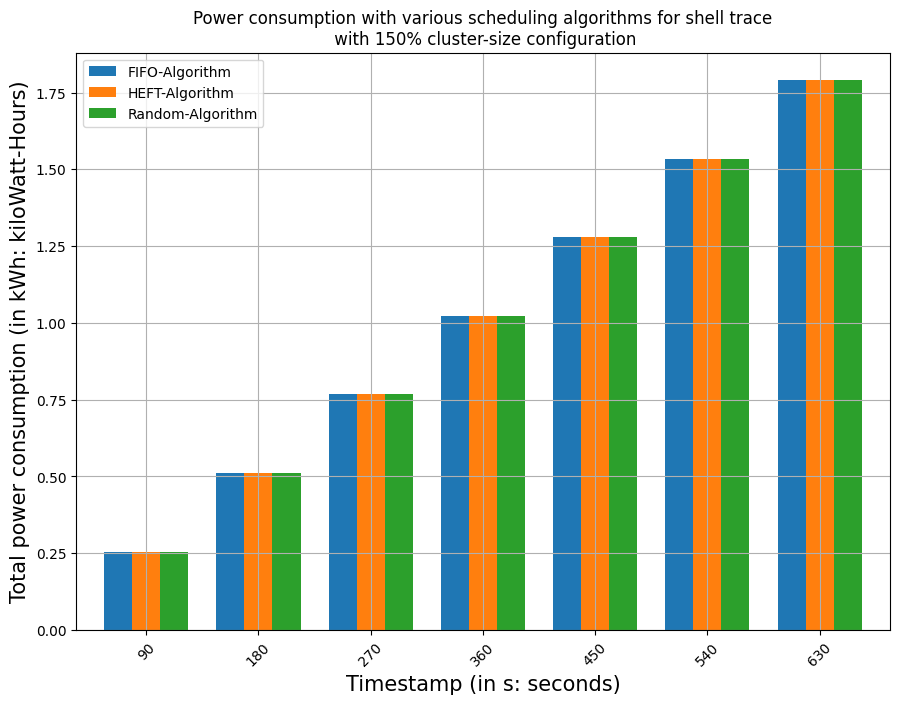

In [12]:
df1 = df_total_power_standard.drop(['serverId'], axis=1)
df2 = df_total_power_heft.drop(['serverId'], axis=1)
df3 = df_total_power_random.drop(['serverId'], axis=1)
# df4 = df_total_power_minmin.drop(['host_id'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
# df_merged["energyUsage_w"] = df_merged["energyUsage_w"]/1000000
df_merged.rename(columns={'energyUsage': 'FIFO-Algorithm', 'energyUsage_y': 'HEFT-Algorithm', 'energyUsage_z': 'Random-Algorithm'}, inplace=True) #, 'energyUsage_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)

# drop first and second column to have consistent distance of plots
df_merged = df_merged.drop(0)
# df_merged = df_merged.reset_index(drop= True)
df_merged = df_merged.drop(1)
df_merged = df_merged.reset_index(drop= True)
# Create a custom x-axis with every 3rd value, due to very large number of elements in timestamp!
df_merged = df_merged[df_merged.index % 3 == 0]

# print(df_merged)
# Create a bar plot of the merged dataframe, grouped by timestamp
fig, ax = plt.subplots()
df_merged.plot.bar(x='timestamp', ax=ax, title='Power consumption with various scheduling algorithms for shell trace\n with 150% cluster-size configuration', width=.75)
plt.gca().xaxis.set_tick_params(rotation=45)
plt.grid(True)
plt.ylabel('Total power consumption (in kWh: kiloWatt-Hours)', fontsize=15)
plt.xlabel('Timestamp (in s: seconds)', fontsize=15)
fig.set_size_inches(10.5, 7.5)
fig.savefig('multiple_hosts_energy_plotted_trace_shell_150.png', bbox_inches='tight')
plt.show()

In [13]:
# df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
# df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
# df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
print(df_merged)

    timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm
0          90        0.255488        0.255488          0.255488
3         180        0.511142        0.511143          0.511143
6         270        0.767164        0.767165          0.767167
9         360        1.022816        1.022817          1.022820
12        450        1.278819        1.278822          1.278824
15        540        1.534442        1.534445          1.534446
18        630        1.790465        1.790469          1.790471


In [14]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['FIFO-Algorithm'] != 0]['FIFO-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard} kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft} kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random} kWh")

Total energy consumption in FIFO algorithm for executing given trace - 1.7904653208532995 kWh
Total energy consumption in HEFT algorithm for executing given trace - 1.7904694181566845 kWh
Total energy consumption in Random algorithm for executing given trace - 1.7904711018451998 kWh


In [15]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[1.7904653208532995, 1.7904694181566845, 1.7904711018451998]


In [16]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.5f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for shell workload trace and 150% cluster-size configuration.")


Resource scheduling algorithm FIFO is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm HEFT records 0.00023% worse energy-efficiency than the scheduling algorithm FIFO for shell workload trace and 150% cluster-size configuration.
Scheduling algorithm Random records 0.00032% worse energy-efficiency than the scheduling algorithm FIFO for shell workload trace and 150% cluster-size configuration.
